In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import cvxpy as cp

# Generate a toy dataset


# r = np.ones(X.shape[0])
# X = np.insert(X, 0, r, axis=1)

# print(X)


set = "classification"
#set = "regression"
if set == "classification":
    n_samples = 16
    dim = 25
else:
    n_samples = 16
    dim = 25
n_features_list = np.arange(3, dim + 1, 10)
costs =[]
distances2 = []
def pltb(set):

    if set == "classification":
        idx0 = np.where(Y_train == -1)
        idx1 = np.where(Y_train == 1)
        plt.plot(X_Train[idx0[0], 0], X_Train[idx0[0], 1], 'rx')
        plt.plot(X_Train[idx1[0], 0], X_Train[idx1[0], 1], 'bo')
    else:
        plt.plot(X_Train[ 0], X_Train[ 1], 'rx')
    xp = np.linspace(np.min(X_Train[:, 0]), np.max(X_Train[:, 0]), 100)
    yp = - (w_s[1] * xp+ w_s[0]) / w_s[2]

    plt.plot(xp, yp, '--b', label='n2')

    yp1 = - (w_sl[1] * xp+ w_sl[0]) / w_sl[2]
    plt.plot(xp, yp1, '-r', label='sl')
    plt.title('log')
    plt.legend()
    plt.show()

def data(set):
    if set == "classification":
        X, Y = datasets.make_blobs(n_samples=n_samples, n_features=dim, centers=2,
                                   cluster_std=[1.0, 1.0], random_state=42)
        Y = Y * 2 - 1
        X_Train = X
        Y_train = np.reshape(Y, (len(Y), 1))
    else:
        X, Y = datasets.make_regression(n_samples=n_samples, n_features=dim, random_state=42)
        X_Train = X
        Y_train = np.ones(len(Y))
        print(Y.shape)
        print(X.shape)
        Y_train = np.reshape(Y, (len(Y), 1))
    return X_Train,Y_train

def leastsquare(x_train, y_train):
    # LS
    w_l = np.linalg.pinv(x_train).dot(y_train).ravel()
    return w_l.ravel()


def L2(x_train, y_train):

    n = x_train.shape[1]
    s_s = cp.Variable((n, 1))
    print(x_train.shape)

    objective = cp.Minimize(cp.norm(s_s))
    constraints = [y_train == x_train @ s_s]
    prob = cp.Problem(objective, constraints)

    prob.solve()
    s_s_value = s_s.value

    return s_s_value.ravel()
k=10
# GRADED FUNCTION: model
def model_squreloss(x_train, y_train, num_iterations=2000, learning_rate=0.5):
    w_sl = np.zeros((x_train.shape[1], 1)) # GRADED FUNCTION: initialize_with_zeros
    # Gradient descent
    # GRADED FUNCTION: optimize
    for i in range(num_iterations):
        # GRADED FUNCTION: propagate
        dw_sl = -(x_train.T@ (y_train - x_train@w_sl ))/n_samples
        # update rule
        w_sl = w_sl - learning_rate * dw_sl
        cost = (np.linalg.norm(y_train-x_train@w_sl )**2)/n_samples


        if i % 10000 == 0:
            costs.append(cost)
            print("Cost after iteration %i: %f" % (i, cost))
            # Print the cost every 1000 training examples
        if 1 and i % k == 0:
            distance2 = np.linalg.norm(w_sl.ravel() - w_s)
            distances2.append(distance2)
    return w_sl.ravel(),distances2



In [23]:
distances2=[]
X_Train,Y_train =data(set)
w_s = L2(X_Train, Y_train)
print(X_Train.shape)
w_sl,distances2 = model_squreloss(X_Train, Y_train, num_iterations = 100000, learning_rate = 0.0004)
w_l = leastsquare(X_Train, Y_train)
# pltb(set)
distance2 = np.linalg.norm(w_sl - w_s)




(16, 25)
(16, 25)
Cost after iteration 0: 0.684191
Cost after iteration 10000: 0.000064
Cost after iteration 20000: 0.000020
Cost after iteration 30000: 0.000006
Cost after iteration 40000: 0.000002
Cost after iteration 50000: 0.000001
Cost after iteration 60000: 0.000000
Cost after iteration 70000: 0.000000
Cost after iteration 80000: 0.000000
Cost after iteration 90000: 0.000000


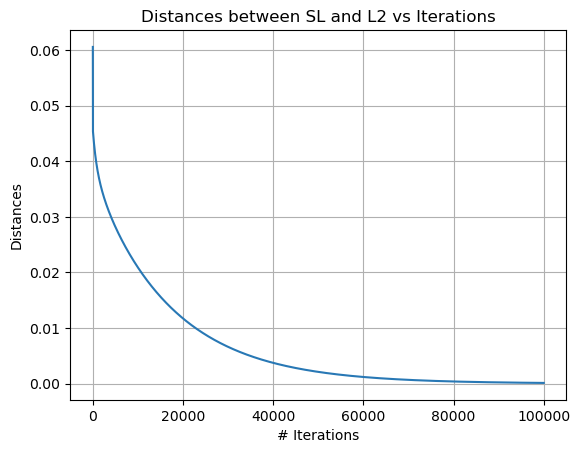

In [29]:
plt.plot(np.arange(0,100000,k),distances2,c='#2878B5')
plt.xlabel("# Iterations")
plt.ylabel("Distances")
plt.title("Distances between SL and L2 vs Iterations")

# plt.legend()
plt.grid()
# plt.xscale('log')
plt.savefig('SL_L2_Iterations.jpg', dpi=300)
plt.show()
# print(distances2)
#distance3 = np.linalg.norm(w_s - w_l)
# print("The coefficients of SL using GD:")
# print(w_sl)

# print("The coefficients of minimum L2 norm:")
# print(w_s)
# print("The distance:")
# print(distance2)
#print(distance3)

In [ ]:
distance3 = np.linalg.norm(w_s - w_l)
print("The coefficients of SL using GD:")
print(w_sl)

print("The coefficients of minimum L2 norm:")
print(w_s)
print("The distance:")
print(distance2)
print(distance3)